<a href="https://www.kaggle.com/code/bhavkaur/zomato-data-analysis?scriptVersionId=133457520" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
print('Done')

## **Reading CSV**

In [ ]:
z_filepath = "/kaggle/input/zomato-bangalore-restaurants/zomato.csv"
z_data = pd.read_csv(z_filepath)
print("Done")

In [ ]:
z_data.head()

In [ ]:
z_data.shape

In [ ]:
z_data.columns

## **Dropping data that is not required**

In [ ]:
z_data=z_data.drop(['url', 'phone', 'address', 'menu_item', 'dish_liked', 'reviews_list'], axis=1)
print('Done')

In [ ]:
z_data.info() #there are some null values since all the values are not equal

## **Dropping Duplicates**

In [ ]:
z_data.drop_duplicates(inplace=True)
print('Done')

In [ ]:
z_data.shape

## **Cleaning Rate Column (since we need simple float values but we is val/5)**

In [ ]:
z_data['rate'].unique()

## **Removing 'NEW','-' and /5**

In [ ]:
def CorrectRate(value):
    if value == 'NEW' or value == '-':
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0] # there will be a split at '/' and a list will be created where we'll be having a float and 5. We are interested in float value only which is present at index=0
        return float(value)
z_data['rate']=z_data['rate'].apply(CorrectRate)
z_data.head()

In [ ]:
#To find the number of null values
z_data.rate.isnull().sum()

## **Handle Null Values**

In [ ]:
#we do not want null values so we will fill the null values by mean
#inplace=True means to create change in original data
z_data['rate'].fillna(z_data['rate'].mean(), inplace=True)
z_data.rate.isnull().sum()
print('Done')

In [ ]:
z_data.info()

In [ ]:
#if there are not many null values then we can use dropna
z_data.dropna(inplace=True)
print('Done')

In [ ]:
z_data.head()

In [ ]:
z_data.info()

In [ ]:
#we do not want long names for columns, so we will rename them
z_data.rename(columns={'approx_cost(for two people)':'Cost2people', 'listed_in(type)':'type'}, inplace=True)
z_data.head()

In [ ]:
z_data['location'].unique()

In [ ]:
z_data['listed_in(city)'].unique()

## **listed_in(city) and location both have same values so let us keep one** 

In [ ]:
z_data=z_data.drop(['listed_in(city)'], axis=1)
print('done')

In [ ]:
z_data.head()

In [ ]:
z_data['Cost2people'].unique()

## **We want to remove comma it is restricting the values to become int or float**

In [ ]:
def CorrectComma(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',', '')
        return float(value)
    else:
        return float(value)
z_data['Cost2people']=z_data['Cost2people'].apply(CorrectComma)
z_data['Cost2people'].unique()

In [ ]:
z_data.head()

****

## **Cleaning location column**

In [ ]:
z_data['location'].value_counts()

In [ ]:
location=z_data['location'].value_counts(ascending=False)
LocationLessThan300 = location[location<300]

def CorrectLocation(value):
    if (value in LocationLessThan300):
        return 'others'
    else:
        return value
z_data['location']=z_data['location'].apply(CorrectLocation)
z_data['location'].value_counts()

In [ ]:
z_data.head()

## **Cleaning rest type column**

In [ ]:
rest_types = z_data['rest_type'].value_counts(ascending  = False)
rest_types

In [ ]:
RestLessThan1000 = rest_types[rest_types<1000]
RestLessThan1000
def CorrectRest(value):
    if(value in RestLessThan1000):
        return 'others'
    else:
        return value
        
z_data['rest_type'] = z_data['rest_type'].apply(CorrectRest)
z_data['rest_type'].value_counts()

In [ ]:
z_data.head()

## **Cleaning cuisines column**

In [ ]:
cuisines = z_data['cuisines'].value_counts(ascending=True)
CuisinesLessThan100 = cuisines[cuisines<100]

def CorrectCuisines(value):
    if(value in CuisinesLessThan100):
        return 'others'
    else:
        return value
        
z_data['cuisines'] = z_data['cuisines'].apply(CorrectCuisines)
z_data['cuisines'].value_counts()

In [ ]:
z_data.head()

# ****Data is clean, now visualizing the data****

## **Count plot for variuos locations**

In [ ]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=z_data, x=z_data['location'])
plt.xticks(rotation=90) #for clear x axis

From above, we conclude that new rest at btm shd not be opened since it is alr4eady having many res. However, rest at commercial street could be opened.

## **Visualising online order**

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data = z_data, x=z_data['online_order'],palette='inferno' )

## **Visualise book table**

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(data=z_data, x=z_data['book_table'], palette='rainbow')

## **Visualising online order and rate**

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=z_data)

## **Visualizing Book Table vs Rate**

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'book_table', y = 'rate', data = z_data)

## **Visualizing Online Order Facility Location Wise**

In [ ]:
z_data1 = z_data.groupby(['location','book_table'])['name'].count()
z_data1.to_csv('LocationBookTable.csv')
z_data1 = pd.read_csv('LocationBookTable.csv')
z_data1 = pd.pivot_table(z_data1, values=None, index=['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)
z_data1

In [ ]:
z_data1.plot(kind = 'bar', figsize = (15,8))

## **Visualizing Types of Rest vs Rate**

<Axes: xlabel='type', ylabel='rate'>

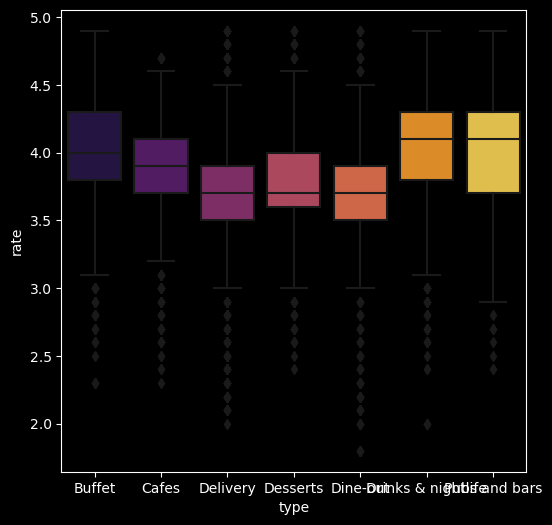

In [51]:
plt.figure(figsize = (6, 6))
#sns.boxplot(x = 'type', y = 'rate', data = z_data, palette = 'rainbow')
sns.boxplot(x = 'type', y = 'rate', data = z_data, palette = 'inferno')

## **Grouping types of rest location wise**

In [53]:
z_data2 = z_data.groupby(['location','type'])['name'].count()
z_data2.to_csv('location_Type.csv')
z_data2 = pd.read_csv('location_Type.csv')
z_data2 = pd.pivot_table(z_data2, values=None, index=['location'], columns=['type'], fill_value=0, aggfunc=np.sum)
z_data2

name                                   \
type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
others                    83   133     2787      276     1553   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

<Axes: xlabel='location'>

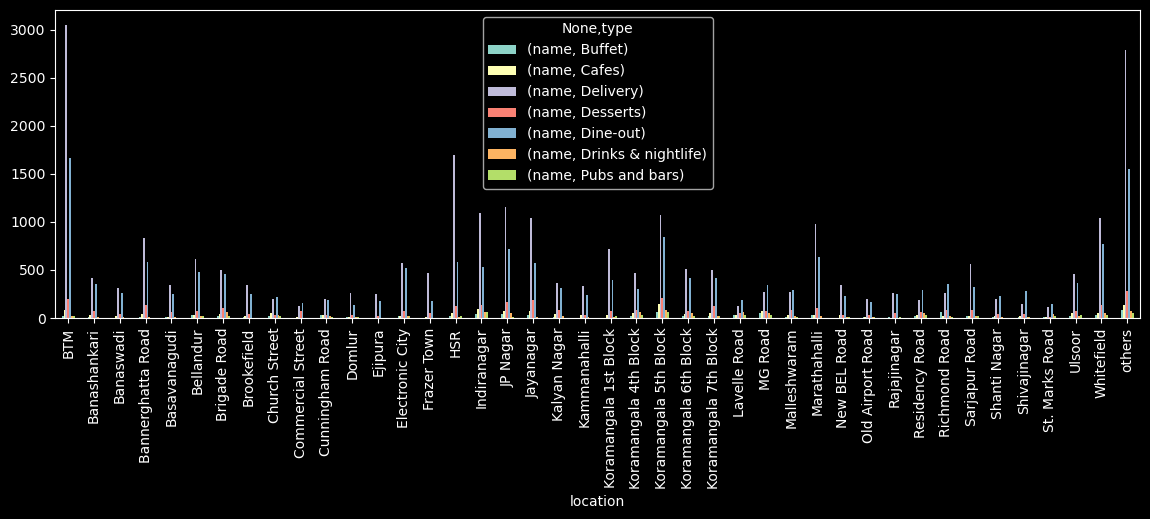

In [57]:
z_data2.plot(kind = 'bar', figsize = (14,4))